<a href="https://colab.research.google.com/github/RukmalRt/Netflix-Data-Analysis/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from textblob import TextBlob

In [6]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats as stats
from numpy import median
from numpy import std

from scipy import stats

Import and Learn Data

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/MyDrive/netflix/Netflix dataset.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [9]:
df.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [10]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [11]:
df.shape

(8790, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [13]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

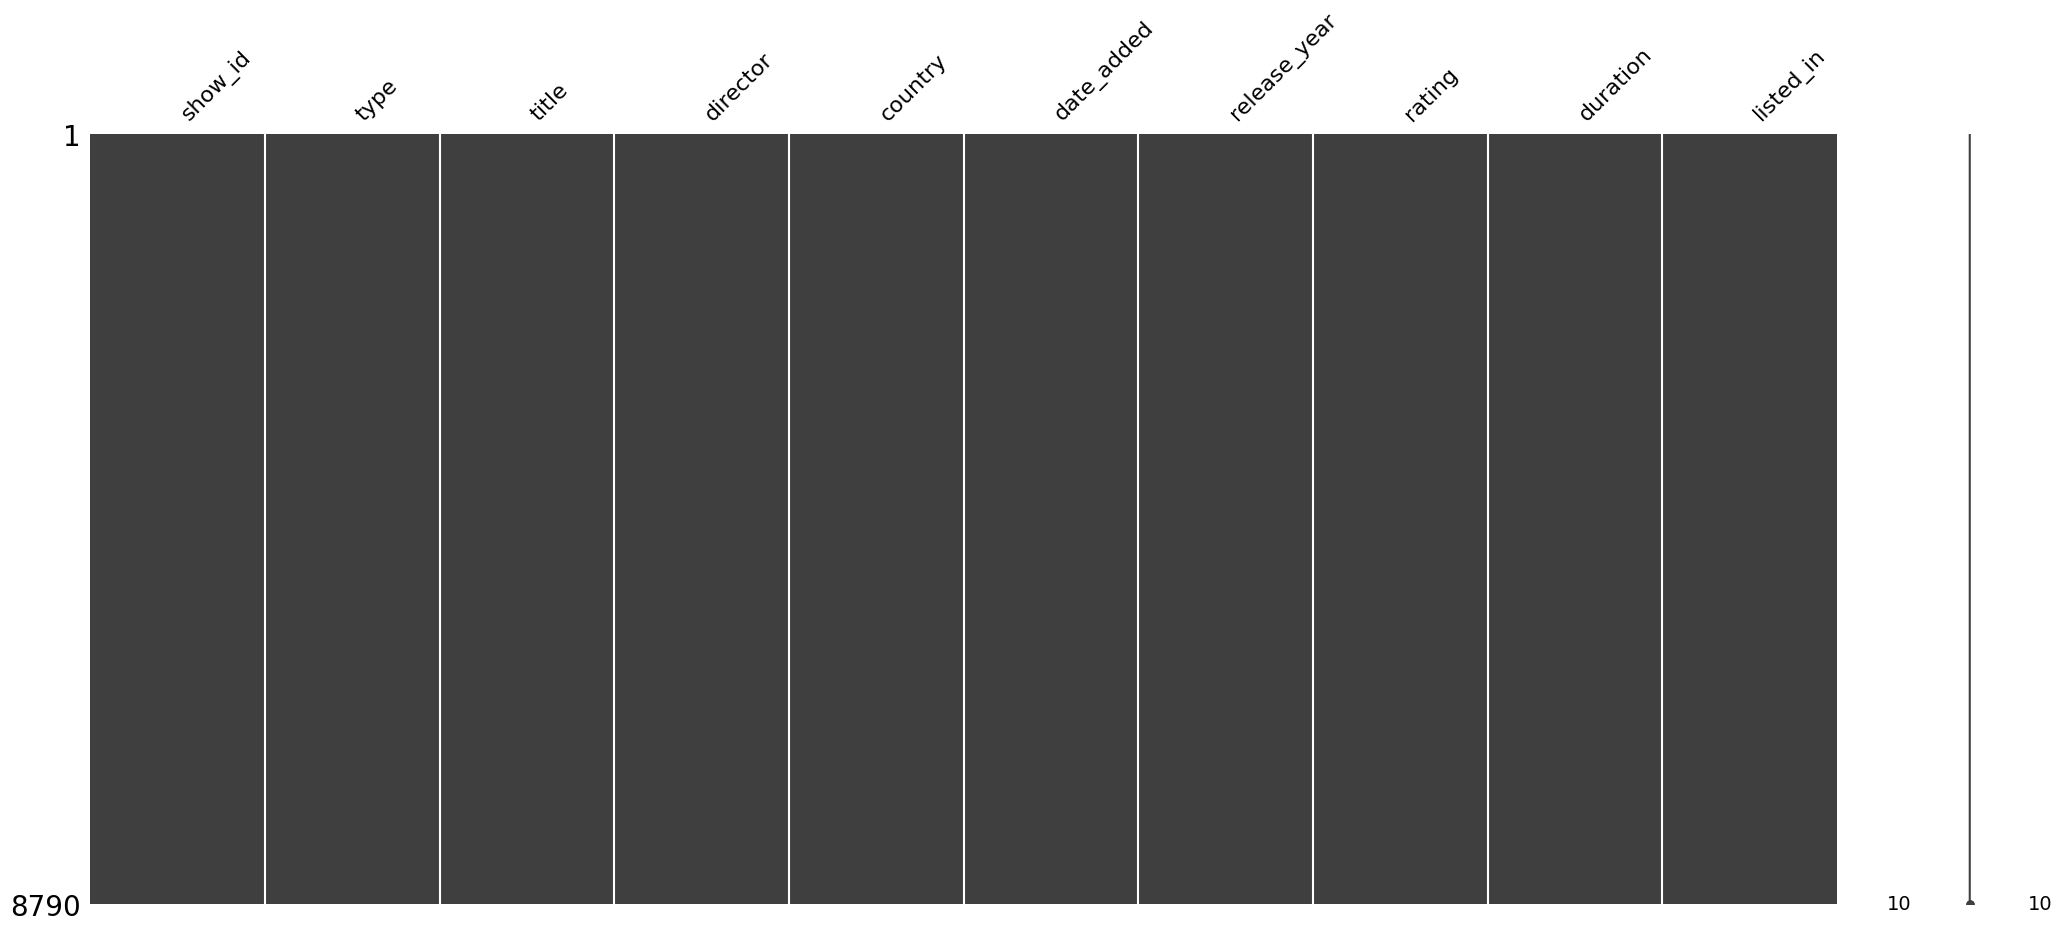

In [14]:
msno.matrix(df)
plt.show()

In [15]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [16]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [17]:
df.loc[df.duplicated()]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in


In [18]:
df.loc[df.duplicated(subset = ['title'])]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
537,s5965,TV Show,9-Feb,Not Given,Pakistan,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
4260,s5966,Movie,22-Jul,Paul Greengrass,Norway,2018-10-10,2018,R,144 min,"Dramas, Thrillers"
4261,s5967,Movie,15-Aug,Swapnaneel Jayakar,India,2019-03-29,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"


Analysis of Countries

In [19]:
df['country'].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

In [20]:
df['country'].value_counts().head(40)

country
United States           3240
India                   1057
United Kingdom           638
Pakistan                 421
Not Given                287
Canada                   271
Japan                    259
South Korea              214
France                   213
Spain                    182
Mexico                   138
Egypt                    123
Australia                114
Turkey                   112
Nigeria                  105
Germany                  104
China                    100
Brazil                    88
Taiwan                    86
Indonesia                 86
Philippines               83
Hong Kong                 79
Argentina                 76
Italy                     66
Thailand                  66
Colombia                  42
South Africa              42
Denmark                   30
Poland                    30
Netherlands               28
Ireland                   28
Singapore                 28
Lebanon                   24
Malaysia                  23
Israel

In [21]:
df['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

<Axes: title={'center': ' Top Countries'}, xlabel='country'>

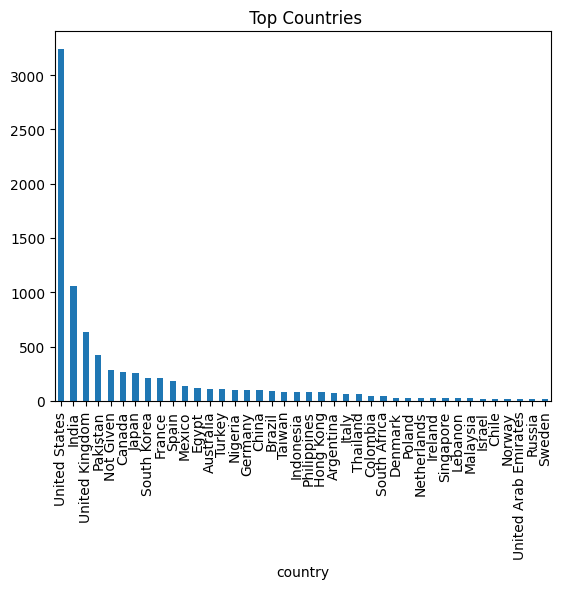

In [22]:
df['country'].value_counts().head(40).plot(kind = 'bar', title = ' Top Countries')

Distribution of Categories

<Axes: title={'center': 'Categories'}, ylabel='count'>

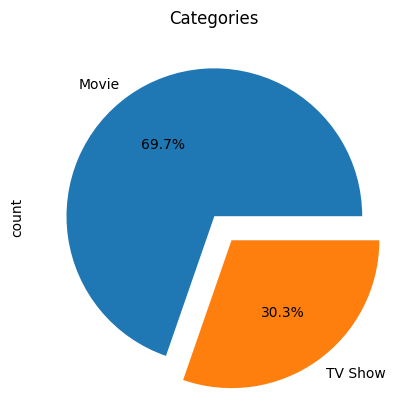

In [23]:
df['type'].value_counts().plot(kind = "pie",autopct = '%1.1f%%', explode = (0, 0.2), title = 'Categories')

In [24]:
df['director'].value_counts().head(40)

director
Not Given                       2588
Rajiv Chilaka                     20
Alastair Fothergill               18
Raúl Campos, Jan Suter            18
Suhas Kadav                       16
Marcus Raboy                      16
Jay Karas                         14
Cathy Garcia-Molina               13
Martin Scorsese                   12
Youssef Chahine                   12
Jay Chapman                       12
Steven Spielberg                  11
Mark Thornton, Todd Kauffman      10
Don Michael Paul                  10
David Dhawan                       9
Ryan Polito                        8
Johnnie To                         8
Lance Bangs                        8
Troy Miller                        8
Robert Rodriguez                   8
Shannon Hartman                    8
Yılmaz Erdoğan                     8
Fernando Ayllón                    8
Hakan Algül                        8
Quentin Tarantino                  8
Kunle Afolayan                     8
Ram Gopal Varma              

Analysis of Reviews

In [25]:
x = df.groupby(['rating']).size().reset_index(name = 'counts')
x

,rating,counts
0,G,41
1,NC-17,3
2,NR,79
3,PG,287
4,PG-13,490
5,R,799
6,TV-14,2157
7,TV-G,220
8,TV-MA,3205
9,TV-PG,861


In [26]:
#piechart = px.pie(x, values = 'counts', title ='Distribution of content ratings')
#piechart.show()

<Axes: title={'center': 'Ratings'}, ylabel='count'>

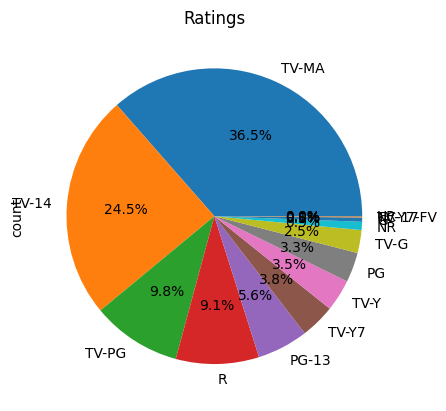

In [27]:
df['rating'].value_counts().plot(kind = "pie",autopct = '%1.1f%%', title = 'Ratings')

Analysis of Directors

In [28]:
director_list = pd.DataFrame()

In [29]:
director_list = df['director'].str.split(',', expand = True).stack()
director_list

0     0    Kirsten Johnson
1     0    Julien Leclercq
2     0      Mike Flanagan
3     0      Bruno Garotti
4     0       Haile Gerima
                ...       
8785  0          Not Given
8786  0          Not Given
8787  0          Not Given
8788  0          Not Given
8789  0          Not Given
Length: 9610, dtype: object

In [30]:
director_list = director_list.to_frame()

In [31]:
director_list.columns = ['Directors']
director = director_list.groupby(['Directors']).size().reset_index(name = 'total_count')
director = director[director.Directors != 'Not Given']
director = director.sort_values(by= ['total_count'], ascending = False)
top10director = director.head(10)
top10director = top10director.sort_values(by = 'total_count', ascending= True)
director_chart = px.bar(top10director, x = 'total_count', y = 'Directors', title = 'Top 10 Directors on Netflix')
director_chart

In [32]:
#directors = df.groupby(['director']).size().reset_index(name = 'total_count')
#directors

In [33]:
#directors = directors[directors.director != 'Not Given']
#directors

In [34]:
#directors = directors.sort_values(by = ['total_count'], ascending= False)
#directors

In [35]:
#top10directors = directors.head(10)
#top10directors

In [36]:
#top10directors = top10directors.sort_values(by = 'total_count', ascending= True)
#barchart = px.bar(top10directors, x = 'total_count', y = 'director', title = 'Top 10 Directors on Netfilx')
#barchart

Analysis According to Year

In [37]:
df1 = df[['type', 'release_year']]
df2 = df1.groupby(['release_year', 'type']).size().reset_index(name = 'total_count')
df2

,release_year,type,total_count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,Movie,277


In [38]:
df2 = df2[df2['release_year']>=2000]
graph = px.line(df2, x = 'release_year', y = 'total_count',color = 'type', title = 'Trend of Contect on Netflix by Year')
graph

Analysis of Genre

In [39]:
df['listed_in'].value_counts().head(50)

listed_in
Dramas, International Movies                                         362
Documentaries                                                        359
Stand-Up Comedy                                                      334
Comedies, Dramas, International Movies                               274
Dramas, Independent Movies, International Movies                     252
Kids' TV                                                             219
Children & Family Movies                                             215
Children & Family Movies, Comedies                                   201
Documentaries, International Movies                                  186
Dramas, International Movies, Romantic Movies                        180
Comedies, International Movies                                       176
Comedies, International Movies, Romantic Movies                      152
Dramas                                                               137
Dramas, International Movies, Thrillers  

In [40]:
genre = pd.DataFrame()
genre = df['listed_in'].str.split(',', expand=True).stack()
genre = genre.to_frame()
genre.columns = ['Genre']
genre_type = genre.groupby(['Genre']).size().reset_index(name = 'total_count')
genre_type = genre_type.sort_values(by= ['total_count'], ascending = False)
top10genres = genre_type.head(10)
top10genres = top10genres.sort_values(by = 'total_count', ascending= True)
genre_chart = px.bar(top10genres, x = 'total_count', y = 'Genre', title = 'Top 10 Genres on Netflix')
genre_chart

In [41]:
genre_type.head(10)

,Genre,total_count
13,International Movies,2624
49,Dramas,1599
44,Comedies,1210
37,Action & Adventure,859
47,Documentaries,829
9,Dramas,827
53,International TV Shows,773
12,Independent Movies,736
30,TV Dramas,695
20,Romantic Movies,613


In [42]:
genre_type.duplicated().head(20)

13    False
49    False
44    False
37    False
47    False
9     False
53    False
12    False
30    False
20    False
41    False
14    False
36    False
4     False
29    False
45    False
54    False
18    False
21    False
64    False
dtype: bool

Analysis of Trending of Genres

In [43]:
def is_international(movie_type, listed_in):
  if movie_type == 'Movie':
    return 'International Movies' in listed_in
  else:
    return False

df['International Movies'] = df.apply(lambda x: is_international(x['type'], x['listed_in']), axis=1)

In [44]:
def is_drama(movie_type, listed_in):
  if movie_type == 'Movie':
    return 'Dramas' in listed_in
  else:
    return False

df['Dramas'] = df.apply(lambda x: is_drama(x['type'], x['listed_in']), axis=1)

In [45]:
def is_Comedies(movie_type, listed_in):
  if movie_type == 'Movie':
    return 'Comedies' in listed_in
  else:
    return False

df['Comedies'] = df.apply(lambda x: is_Comedies(x['type'], x['listed_in']), axis=1)

In [46]:
def is_action(movie_type, listed_in):
  if movie_type == 'Movie':
    return 'Action & Adventure' in listed_in
  else:
    return False

df['Action & Adventure'] = df.apply(lambda x: is_action(x['type'], x['listed_in']), axis=1)

In [47]:
def is_documentry(movie_type, listed_in):
  if movie_type == 'Movie':
    return 'Documentaries' in listed_in
  else:
    return False

df['Documentaries'] = df.apply(lambda x: is_documentry(x['type'], x['listed_in']), axis=1)

In [48]:
def is_its(movie_type, listed_in):
  if movie_type == 'Movie':
    return 'International TV Shows' in listed_in
  else:
    return False

df['International TV Shows'] = df.apply(lambda x: is_its(x['type'], x['listed_in']), axis=1)

In [49]:
def is_independant(movie_type, listed_in):
  if movie_type == 'Movie':
    return 'Independent Movies' in listed_in
  else:
    return False

df['Independent Movies'] = df.apply(lambda x: is_independant(x['type'], x['listed_in']), axis=1)

In [50]:
def is_tvdrama(movie_type, listed_in):
  if movie_type == 'Movie':
    return 'TV Dramas' in listed_in
  else:
    return False

df['TV Dramas'] = df.apply(lambda x: is_tvdrama(x['type'], x['listed_in']), axis=1)

In [51]:
def is_romantic(movie_type, listed_in):
  if movie_type == 'Movie':
    return 'Romantic Movies' in listed_in
  else:
    return False

df['Romantic Movies'] = df.apply(lambda x: is_romantic(x['type'], x['listed_in']), axis=1)

In [52]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in',
       'International Movies', 'Dramas', 'Comedies', 'Action & Adventure',
       'Documentaries', 'International TV Shows', 'Independent Movies',
       'TV Dramas', 'Romantic Movies'],
      dtype='object')

In [53]:
df_movies = df[['release_year', 'International Movies', 'Dramas', 'Comedies', 'Action & Adventure', 'Documentaries', 'International TV Shows', 'Independent Movies', 'TV Dramas', 'Romantic Movies']]

In [54]:
#df_movie = df_movies.groupby(['release_year', 'International Movies', 'Dramas', 'Comedies', 'Action & Adventure', 'Documentaries', 'International TV Shows', 'Independent Movies', 'TV Dramas', 'Romantic Movies']).size().reset_index(name = 'total_count')
#df_movie = df_movie[df_movie['release_year']>=2000]
#graph_movie = px.density_heatmap(df_movie, x = 'release_year', y = 'total_count', title = 'Trend of Movies on Netflix by Year')
#graph_movie

In [55]:
#plt.figure(figsize=(12, 6))

#plt.bar(df_movie['release_year'], df_movie['total_count'], color='lightblue', label='Total Movies')
#plt.bar(df_movie['release_year'], df_movie['International Movies'], color='orange', label='International Movies')
#plt.bar(df_movie['release_year'], df_movie['Dramas'], color='green', label='Dramas')
#plt.bar(df_movie['release_year'], df_movie['Comedies'], color='blue', label='Comedies')
#plt.bar(df_movie['release_year'], df_movie['Action & Adventure'], color='red', label='Action & Adventure')
#plt.bar(df_movie['release_year'], df_movie['Documentaries'], color='purple', label='Documentaries')
##plt.bar(df_movie['release_year'], df_movie['International TV Shows'], color='yellow', label='International TV Shows')
#plt.bar(df_movie['release_year'], df_movie['Independent Movies'], color='brown', label='Independent Movies')
#plt.bar(df_movie['release_year'], df_movie['TV Dramas'], color='gray', label='TV Dramas')
#plt.bar(df_movie['release_year'], df_movie['Romantic Movies'], color='pink', label='Romantic Movies')

##plt.xlabel('Release Year')
#plt.ylabel('Count')
#plt.title('Distribution of Movies by Genre over the Years')
##plt.legend()
#plt.xticks(rotation=45)
#plt.tight_layout()
#plt.show()

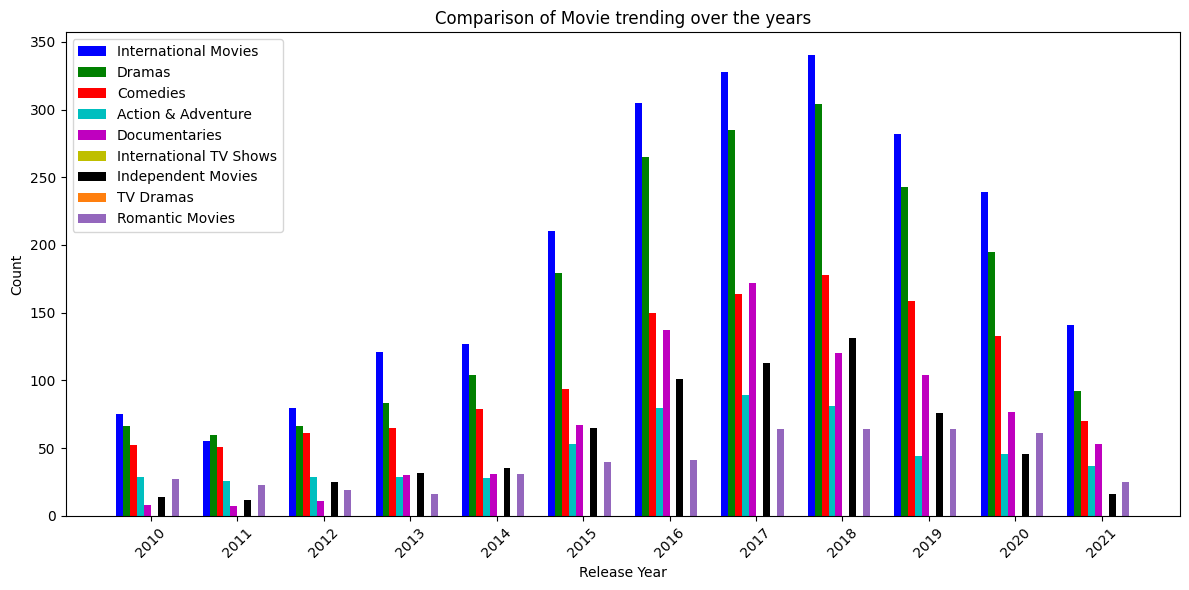

In [56]:
# Grouping the DataFrame
df_grouped = df_movies.groupby(['release_year']).sum().reset_index()
df_grouped = df_grouped[df_grouped['release_year'] >= 2010]

# Relevant columns
years = df_grouped['release_year']
genres1 = ['International Movies', 'Dramas', 'Comedies', 'Action & Adventure', 'Documentaries', 'International TV Shows', 'Independent Movies', 'TV Dramas', 'Romantic Movies']
genre_counts = df_grouped[genres1].values.T

# Creating the grouped bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.08
index = np.arange(len(years))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:orange', 'tab:purple']

for i, genre_count in enumerate(genre_counts):
    plt.bar(index + i * bar_width, genre_count, bar_width, label=genres1[i], color=colors[i])

plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Comparison of Movie trending over the years')
plt.xticks(index + bar_width * len(genres1) / 2, years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [57]:
def is_internationaltv(movie_type, listed_in):
  if movie_type == 'TV Show':
    return 'International Movies' in listed_in
  else:
    return False

df['International Movies-TV'] = df.apply(lambda x: is_internationaltv(x['type'], x['listed_in']), axis=1)

In [58]:
def is_dramatv(movie_type, listed_in):
  if movie_type == 'TV Show':
    return 'Dramas' in listed_in
  else:
    return False

df['Dramas TV'] = df.apply(lambda x: is_dramatv(x['type'], x['listed_in']), axis=1)

In [59]:
def is_Comediestv(movie_type, listed_in):
  if movie_type == 'TV Show':
    return 'Comedies' in listed_in
  else:
    return False

df['Comedies TV'] = df.apply(lambda x: is_Comediestv(x['type'], x['listed_in']), axis=1)

In [60]:
def is_actiontv(movie_type, listed_in):
  if movie_type == 'TV Show':
    return 'Action & Adventure' in listed_in
  else:
    return False

df['Action & Adventure TV'] = df.apply(lambda x: is_actiontv(x['type'], x['listed_in']), axis=1)

In [61]:
def is_documentrytv(movie_type, listed_in):
  if movie_type == 'TV Show':
    return 'Documentaries' in listed_in
  else:
    return False

df['Documentaries TV'] = df.apply(lambda x: is_documentrytv(x['type'], x['listed_in']), axis=1)

In [62]:
def is_romantictv(movie_type, listed_in):
  if movie_type == 'Movie':
    return 'Romantic Movies' in listed_in
  else:
    return False

df['Romantic Movies TV'] = df.apply(lambda x: is_romantictv(x['type'], x['listed_in']), axis=1)

In [63]:
def is_independanttv(movie_type, listed_in):
  if movie_type == 'TV Show':
    return 'Independent Movies' in listed_in
  else:
    return False

df['Independent Movies TV'] = df.apply(lambda x: is_independanttv(x['type'], x['listed_in']), axis=1)

In [64]:
def is_itstv(movie_type, listed_in):
  if movie_type == 'TV Shows':
    return 'International TV Shows' in listed_in
  else:
    return False

df['International TV Shows TV'] = df.apply(lambda x: is_itstv(x['type'], x['listed_in']), axis=1)

In [65]:
def is_tvdramatv(movie_type, listed_in):
  if movie_type == 'TV Shows':
    return 'TV Dramas' in listed_in
  else:
    return False

df['TV Dramas TV'] = df.apply(lambda x: is_tvdramatv(x['type'], x['listed_in']), axis=1)

In [66]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in',
       'International Movies', 'Dramas', 'Comedies', 'Action & Adventure',
       'Documentaries', 'International TV Shows', 'Independent Movies',
       'TV Dramas', 'Romantic Movies', 'International Movies-TV', 'Dramas TV',
       'Comedies TV', 'Action & Adventure TV', 'Documentaries TV',
       'Romantic Movies TV', 'Independent Movies TV',
       'International TV Shows TV', 'TV Dramas TV'],
      dtype='object')

In [67]:
df_tvs = df[['release_year', 'International Movies-TV', 'Dramas TV', 'Comedies TV', 'Action & Adventure TV', 'Documentaries TV', 'International TV Shows TV', 'Independent Movies TV', 'TV Dramas TV', 'Romantic Movies TV']]

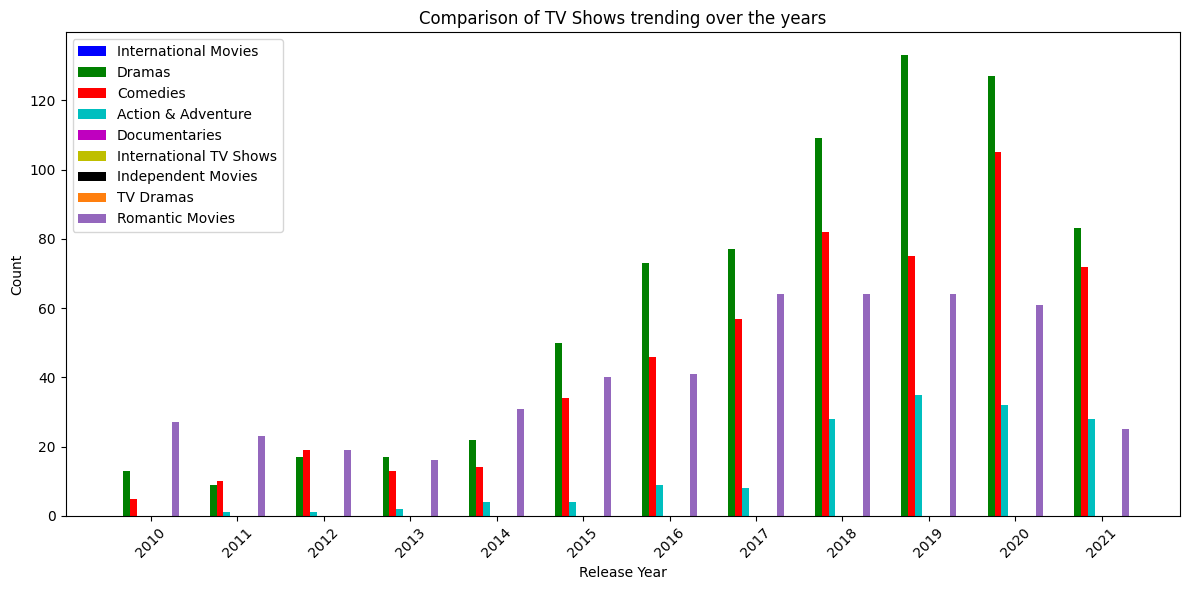

In [68]:
# Grouping the DataFrame
df_grouped1 = df_tvs.groupby(['release_year']).sum().reset_index()
df_grouped1 = df_grouped1[df_grouped1['release_year'] >= 2010]

# Extracting relevant columns
years = df_grouped1['release_year']
genres2 = ['International Movies-TV', 'Dramas TV', 'Comedies TV', 'Action & Adventure TV', 'Documentaries TV', 'International TV Shows TV', 'Independent Movies TV', 'TV Dramas TV', 'Romantic Movies TV']
genre_counts1 = df_grouped1[genres2].values.T

# Creating the grouped bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.08
index = np.arange(len(years))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:orange', 'tab:purple']

for i, genre_count in enumerate(genre_counts1):
    plt.bar(index + i * bar_width, genre_count, bar_width, label=genres1[i], color=colors[i])

plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Comparison of TV Shows trending over the years')
plt.xticks(index + bar_width * len(genres1) / 2, years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()